## Interaction energy plotter

This notebook can be used to read in the DFT data and plot interaction energies as a function of distance. 
Data is provided for energies at different trajectories of approach so that the uncertainty associated witht he angle of approach can be calculated.

In order to run the plotter successfully, you will need to ensure the csv file (obtained from github) is in the same directory as this notebook.

In [3]:
import numpy as np 
import pandas as pd
from matplotlib import pyplot as plt

## CONSTANTS

Total energy values for the isolated molecule and silver atom, necessary for obtaining formation energies.

In [4]:
PFOMA = -11451814.82 #meV
Ag = -1005148.447 #meV
components = PFOMA + Ag

Read in data and convert to Python friendly format.

In [5]:
#Read in csv file
PFOMA=pd.read_csv('PFOMA.csv',)
PFOMA

#Convert csv data into python friendly arrays
distances = PFOMA['Distances'].values
energies = PFOMA['energies_mev'].values
one_deg_energies = PFOMA['1deg_energies_meV'].values
two_deg_energies = PFOMA['2deg_energies_meV'].values


Calculate formation energies.

In [8]:
formation_energies = energies - components
formation_energies_ev = formation_energies * 10**-3
formation_energies_1deg = one_deg_energies - components
formation_energies_2deg = two_deg_energies - components

Plot the interaction energy between PFOMA and Ag.

Text(0, 0.5, ' Formation energy (eV)')

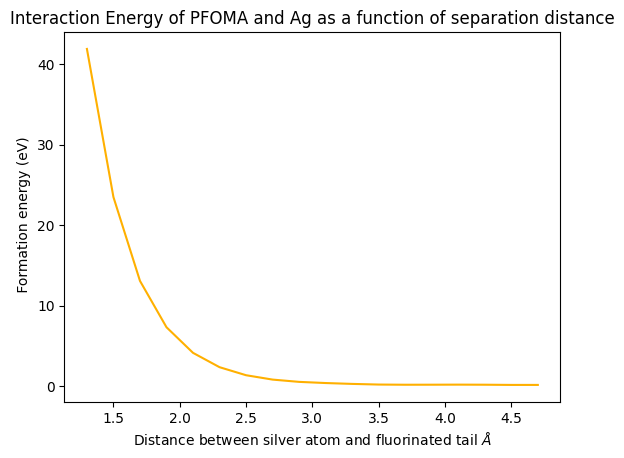

In [10]:
plt.plot(distances, formation_energies_ev, color='#FFB000')
plt.title('Interaction Energy of PFOMA and Ag as a function of separation distance')
plt.xlabel('Distance between silver atom and fluorinated tail $\AA$')
plt.ylabel(' Formation energy (eV)')

## Uncertainty due to Basis Set Superposition Error (BSSE)

Re-calculate the interaction energy between PFOMA and Ag using counterpoise correction method.

In [ ]:
configs = ['1.5', '2.3', '3.1']

pbe = np.array([-456.686342200995171, -457.66419971238054, -457.754943160406413])
pbe_mev = pbe * 27.211324570273 * 10**3

pbe_BSSE = np.array([-456.685834, -457.664860, -457.755778])
pbe_BSSE_mev = pbe_BSSE * 27.211324570273 * 10**3

diff = np.abs(pbe_BSSE - pbe)

In [ ]:
plt.plot(configs, diff, color='#648FFF')
plt.title('Difference between original and BSSE corrected energies ')
plt.xlabel('Distance between silver and fluorinated tail $\AA$')
plt.ylabel('Total Energy (meV)')

## Uncertainty due to angle of approach

Calculate the difference in interaction energy caused by varying the angle of approach by one degree.

In [ ]:
diff01 = abs(formation_energies - formation_energies_1deg) 
diff12 = abs(formation_energies_1deg - formation_energies_2deg)


Text(0, 0.5, ' Energy(meV)')

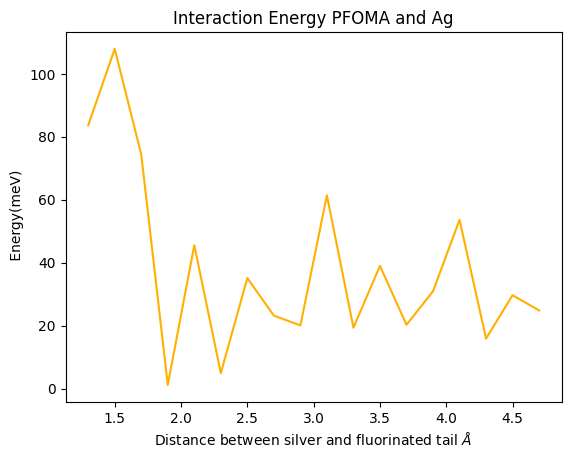

In [31]:
#.plot(distances, formation_energies, color='#FFB000')
#plt.plot(distances, formation_energies_1deg, color='#DC267F', label = '1 degree')

plt.plot(distances, diff01, color='#FFB000')
#plt.plot(distances, diff12, color='#DC267F', label = '1 degree')
plt.title('Interaction Energy PFOMA and Ag')
#plt.legend()
plt.xlabel('Distance between silver and fluorinated tail $\AA$')
plt.ylabel(' Energy(meV)')
#plt.yscale('log')